In [1]:
import pandas as pd

qc_data = {
    "Batch_ID": ["B001","B002","B003","B004","B005","B006","B007","B008","B009","B010"],
    "Assay_%": [98.5, 101.2, 99.1, 102.5, 97.8, 100.5, 96.9, 103.1, 99.7, 98.9],
    "Moisture_%": [1.2, 0.9, 1.5, 0.8, 1.9, 1.1, 2.2, 0.7, 1.0, 1.3],
    "Yield_%": [92, 95, 90, 97, 89, 94, 88, 98, 93, 91],
    "Pass_Fail": ["Pass","Pass","Pass","Fail","Pass","Pass","Fail","Fail","Pass","Pass"]
}

qc_df = pd.DataFrame(qc_data)
qc_df


,Batch_ID,Assay_%,Moisture_%,Yield_%,Pass_Fail
0,B001,98.5,1.2,92,Pass
1,B002,101.2,0.9,95,Pass
2,B003,99.1,1.5,90,Pass
3,B004,102.5,0.8,97,Fail
4,B005,97.8,1.9,89,Pass
5,B006,100.5,1.1,94,Pass
6,B007,96.9,2.2,88,Fail
7,B008,103.1,0.7,98,Fail
8,B009,99.7,1.0,93,Pass
9,B010,98.9,1.3,91,Pass


In [2]:
# Quick overview of the QC dataset
qc_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Batch_ID    10 non-null     object 
 1   Assay_%     10 non-null     float64
 2   Moisture_%  10 non-null     float64
 3   Yield_%     10 non-null     int64  
 4   Pass_Fail   10 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 532.0+ bytes


In [3]:
# Summary statistics for numeric columns
qc_df.describe()


,Assay_%,Moisture_%,Yield_%
count,10.000,10.000000,10.000
mean,99.820,1.260000,92.700
std,2.001,0.483506,3.335
min,96.900,0.700000,88.000
25%,98.600,0.925000,90.250
50%,99.400,1.150000,92.500
75%,101.025,1.450000,94.750
max,103.100,2.200000,98.000


In [4]:
# Average values by Pass/Fail
qc_df.groupby("Pass_Fail")[["Assay_%", "Moisture_%", "Yield_%"]].mean()


,Assay_%,Moisture_%,Yield_%
Pass_Fail,,,
Fail,100.833333,1.233333,94.333333
Pass,99.385714,1.271429,92.000000


In [6]:
import matplotlib.pyplot as plt



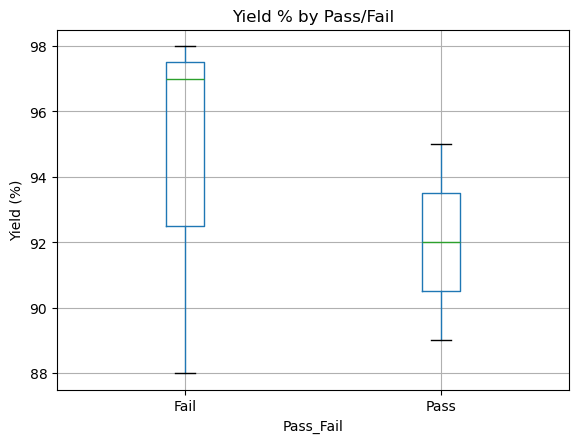

In [7]:
# Simple boxplot of Yield by Pass/Fail
qc_df.boxplot(column="Yield_%", by="Pass_Fail")
plt.title("Yield % by Pass/Fail")
plt.suptitle("")  # remove extra automatic title
plt.xlabel("Pass_Fail")
plt.ylabel("Yield (%)")
plt.show()


### Week 3 – QC Data Exploration (Day 1)

- I created a small GMP-style QC dataset with Batch ID, Assay %, Moisture %, Yield %, and Pass/Fail status.
- I reviewed summary statistics to understand typical assay, moisture, and yield ranges.
- I compared Pass vs Fail batches and observed how quality metrics differ between them.
- I plotted Yield % by Pass/Fail to visually inspect whether failing batches tend to have lower yields or more variability.


In [8]:
qc_df["Pass_Fail"].value_counts()


Pass_Fail
Pass    7
Fail    3
Name: count, dtype: int64

In [9]:
qc_df["Pass_Fail"].value_counts(normalize=True) * 100


Pass_Fail
Pass    70.0
Fail    30.0
Name: proportion, dtype: float64

In [10]:
qc_df.groupby("Pass_Fail")[["Assay_%", "Moisture_%", "Yield_%"]].mean()


,Assay_%,Moisture_%,Yield_%
Pass_Fail,,,
Fail,100.833333,1.233333,94.333333
Pass,99.385714,1.271429,92.000000


In [11]:
# Define QC specification limits
ASSAY_LOW = 98.0
ASSAY_HIGH = 102.0
MOISTURE_MAX = 1.5
YIELD_MIN = 90


In [12]:
def qc_decision(row):
    issues = []

    # Check assay
    if row["Assay_%"] < ASSAY_LOW or row["Assay_%"] > ASSAY_HIGH:
        issues.append("Assay OOS")
    
    # Check moisture
    if row["Moisture_%"] > MOISTURE_MAX:
        issues.append("High Moisture")
    
    # Check yield
    if row["Yield_%"] < YIELD_MIN:
        issues.append("Low Yield")

    if len(issues) == 0:
        return "Within Spec"
    else:
        return ", ".join(issues)

qc_df["QC_Evaluation"] = qc_df.apply(qc_decision, axis=1)
qc_df


,Batch_ID,Assay_%,Moisture_%,Yield_%,Pass_Fail,QC_Evaluation
0,B001,98.5,1.2,92,Pass,Within Spec
1,B002,101.2,0.9,95,Pass,Within Spec
2,B003,99.1,1.5,90,Pass,Within Spec
3,B004,102.5,0.8,97,Fail,Assay OOS
4,B005,97.8,1.9,89,Pass,"Assay OOS, High Moisture, Low Yield"
5,B006,100.5,1.1,94,Pass,Within Spec
6,B007,96.9,2.2,88,Fail,"Assay OOS, High Moisture, Low Yield"
7,B008,103.1,0.7,98,Fail,Assay OOS
8,B009,99.7,1.0,93,Pass,Within Spec
9,B010,98.9,1.3,91,Pass,Within Spec


In [13]:
qc_df["QC_Evaluation"].value_counts()


QC_Evaluation
Within Spec                            6
Assay OOS                              2
Assay OOS, High Moisture, Low Yield    2
Name: count, dtype: int64

In [14]:
qc_df[["Batch_ID","Assay_%","Moisture_%","Yield_%","QC_Evaluation"]]


,Batch_ID,Assay_%,Moisture_%,Yield_%,QC_Evaluation
0,B001,98.5,1.2,92,Within Spec
1,B002,101.2,0.9,95,Within Spec
2,B003,99.1,1.5,90,Within Spec
3,B004,102.5,0.8,97,Assay OOS
4,B005,97.8,1.9,89,"Assay OOS, High Moisture, Low Yield"
5,B006,100.5,1.1,94,Within Spec
6,B007,96.9,2.2,88,"Assay OOS, High Moisture, Low Yield"
7,B008,103.1,0.7,98,Assay OOS
8,B009,99.7,1.0,93,Within Spec
9,B010,98.9,1.3,91,Within Spec


In [15]:
qc_df[qc_df["QC_Evaluation"].str.contains("High Moisture", na=False)]


,Batch_ID,Assay_%,Moisture_%,Yield_%,Pass_Fail,QC_Evaluation
4,B005,97.8,1.9,89,Pass,"Assay OOS, High Moisture, Low Yield"
6,B007,96.9,2.2,88,Fail,"Assay OOS, High Moisture, Low Yield"


In [16]:
assay_issues = qc_df[qc_df["QC_Evaluation"].str.contains("Assay OOS", na=False)]
assay_issues[["Batch_ID", "Assay_%", "Moisture_%", "Yield_%", "QC_Evaluation"]]


,Batch_ID,Assay_%,Moisture_%,Yield_%,QC_Evaluation
3,B004,102.5,0.8,97,Assay OOS
4,B005,97.8,1.9,89,"Assay OOS, High Moisture, Low Yield"
6,B007,96.9,2.2,88,"Assay OOS, High Moisture, Low Yield"
7,B008,103.1,0.7,98,Assay OOS


In [17]:
assay_issues["Assay_%"].describe()


count      4.000000
mean     100.075000
std        3.177394
min       96.900000
25%       97.575000
50%      100.150000
75%      102.650000
max      103.100000
Name: Assay_%, dtype: float64

In [18]:
yield_issues = qc_df[qc_df["QC_Evaluation"].str.contains("Low Yield", na=False)]
yield_issues[["Batch_ID", "Assay_%", "Moisture_%", "Yield_%", "QC_Evaluation"]]


,Batch_ID,Assay_%,Moisture_%,Yield_%,QC_Evaluation
4,B005,97.8,1.9,89,"Assay OOS, High Moisture, Low Yield"
6,B007,96.9,2.2,88,"Assay OOS, High Moisture, Low Yield"


In [19]:
qc_df.groupby("QC_Evaluation")[["Yield_%"]].mean()


,Yield_%
QC_Evaluation,
Assay OOS,97.5
"Assay OOS, High Moisture, Low Yield",88.5
Within Spec,92.5


In [20]:
qc_df.groupby("Pass_Fail")[["Yield_%"]].mean()


,Yield_%
Pass_Fail,
Fail,94.333333
Pass,92.000000


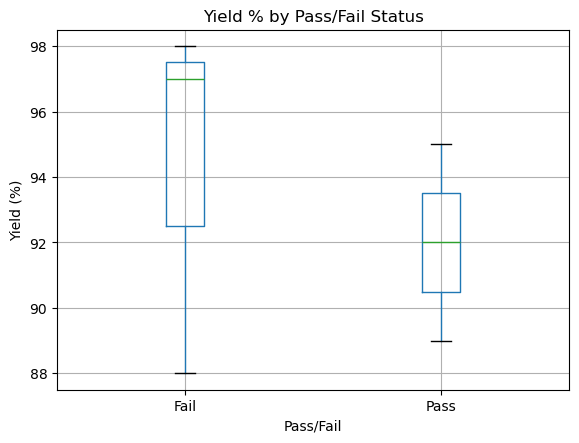

In [21]:
import matplotlib.pyplot as plt

qc_df.boxplot(column="Yield_%", by="Pass_Fail")
plt.title("Yield % by Pass/Fail Status")
plt.suptitle("")
plt.xlabel("Pass/Fail")
plt.ylabel("Yield (%)")
plt.show()


### Week 3 – QC Spec-Based Analysis

- I defined specification limits for Assay (98–102%), Moisture (≤ 1.5%), and Yield (≥ 90%).
- Using these limits, I built a rule-based QC_Evaluation system to automatically flag Assay OOS, High Moisture, and Low Yield batches.
- I then focused on:
  - **Assay OOS**: Identified batches with potency outside 98–102%, indicating potential formulation, mixing, or analytical issues.
  - **Low Yield**: Identified batches with yield below 90%, suggesting process inefficiency and potential link to batch failures.
- This mirrors how GMP manufacturing and CMC teams monitor batch quality and investigate deviations.
